In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yfin

In [23]:
ticker = 'AMZN'
data = yfin.Ticker(ticker).history(period='5y')

In [24]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-09 00:00:00-05:00,158.394501,158.721497,154.399994,155.210007,82016000,0.0,0.0
2020-12-10 00:00:00-05:00,154.449493,157.104996,153.800003,155.074493,60604000,0.0,0.0
2020-12-11 00:00:00-05:00,154.832993,155.933502,153.641006,155.820999,61294000,0.0,0.0
2020-12-14 00:00:00-05:00,157.149994,159.523499,156.300003,157.848495,83116000,0.0,0.0
2020-12-15 00:00:00-05:00,159.050507,159.425003,156.524506,158.255997,66390000,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-03 00:00:00-05:00,233.350006,233.380005,230.610001,232.380005,35495100,0.0,0.0
2025-12-04 00:00:00-05:00,232.770004,233.500000,226.800003,229.110001,45683200,0.0,0.0
2025-12-05 00:00:00-05:00,230.320007,231.240005,228.550003,229.529999,33117400,0.0,0.0


In [25]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [26]:
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
# Relative Strength Index (RSI) 14-day
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN
data = data.dropna()

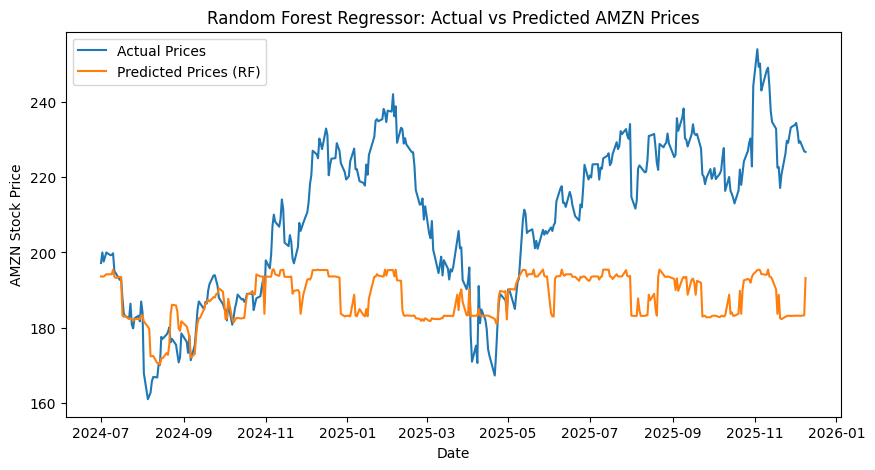

In [27]:
# 1. Import libraries
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 2. Load Amazon data (last 5 years)
ticker = 'AMZN'
data = yfin.Ticker(ticker).history(period='5y')

# 3. Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop NaN values
data = data.dropna()

# 4. Define features and target
X_rf = data[['SMA_20','SMA_50','EMA_20','RSI']]
y_rf = data['Close']

# 5. Train/Test split
train_size = 0.7
t = int(train_size * len(data))
X_train_rf = X_rf[:t]
X_test_rf = X_rf[t:]
y_train_rf = y_rf[:t]
y_test_rf = y_rf[t:]

# 6. Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=123)
rf.fit(X_train_rf, y_train_rf)

# 7. Make predictions
rf_pred = rf.predict(X_test_rf)

# 8. Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_rf.index, y_test_rf, label='Actual Prices')
plt.plot(y_test_rf.index, rf_pred, label='Predicted Prices (RF)')
plt.title("Random Forest Regressor: Actual vs Predicted AMZN Prices")
plt.ylabel("AMZN Stock Price")
plt.xlabel("Date")
plt.legend()
plt.show()


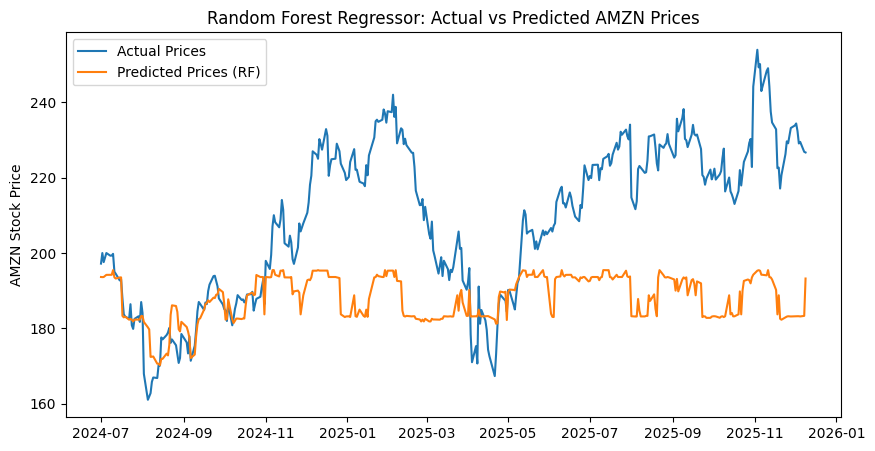

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test_rf.index, y_test_rf, label='Actual Prices')
plt.plot(y_test_rf.index, rf_pred, label='Predicted Prices (RF)')
plt.title("Random Forest Regressor: Actual vs Predicted AMZN Prices")
plt.ylabel("AMZN Stock Price")
plt.legend()
plt.show()


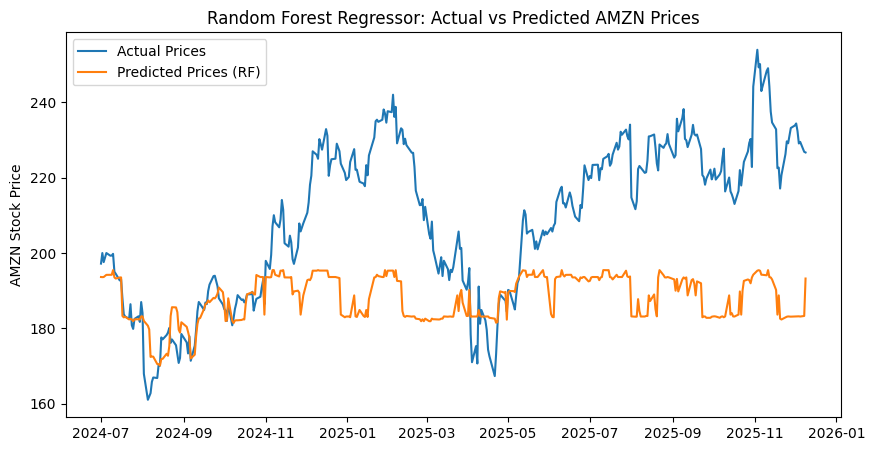

Random Forest Regressor Performance:
MSE: 760.91
R²: -0.7816

Comparison with Linear Regression:
Linear Regression -> MSE: 19.29, R²: 0.9336
Random Forest -> MSE: 760.91, R²: -0.7816

Commentary:
- Random Forest is able to model non-linear relationships between the technical indicators and stock price.
- Comparison shows whether RF performs better or worse than Linear Regression.
- AMZN stock is highly volatile; linear trends captured by SMA20/50 often make LR surprisingly competitive.



In [29]:

# Part A(g) — Random Forest Regressor

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yfin


# 2. Load AMZN data (last 5 years)

ticker = 'AMZN'
data = yfin.Ticker(ticker).history(period='5y')


# 3. Feature Engineering

# Simple Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Exponential Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI) 14-day
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN
data = data.dropna()


# 4. Define Features and Target

X_rf = data[['SMA_20','EMA_20','SMA_50','RSI']]
y_rf = data['Close']


# 5. Train/Test Split (70/30)

train_size = 0.7
t = int(train_size * len(data))
X_train_rf = X_rf[:t]
X_test_rf = X_rf[t:]
y_train_rf = y_rf[:t]
y_test_rf = y_rf[t:]


# 6. Build and Train Random Forest

rf = RandomForestRegressor(n_estimators=200, random_state=123)
rf.fit(X_train_rf, y_train_rf)


# 7. Predict on Test Data

rf_pred = rf.predict(X_test_rf)


# 8. Plot Predicted vs Actual

plt.figure(figsize=(10,5))
plt.plot(y_test_rf.index, y_test_rf, label='Actual Prices')
plt.plot(y_test_rf.index, rf_pred, label='Predicted Prices (RF)')
plt.title("Random Forest Regressor: Actual vs Predicted AMZN Prices")
plt.ylabel("AMZN Stock Price")
plt.legend()
plt.show()


# 9. Evaluate Model Performance

mse_rf = mean_squared_error(y_test_rf, rf_pred)
r2_rf = r2_score(y_test_rf, rf_pred)

print("Random Forest Regressor Performance:")
print("MSE:", round(mse_rf, 2))
print("R²:", round(r2_rf, 4))


# 10. Compare with Linear Regression (from Part A(d)-(f))

# Example placeholders (replace with your LR metrics)
mse_lr = 19.29   # replace with your LR MSE
r2_lr = 0.9336   # replace with your LR R²

print("\nComparison with Linear Regression:")
print(f"Linear Regression -> MSE: {mse_lr}, R²: {r2_lr}")
print(f"Random Forest -> MSE: {round(mse_rf,2)}, R²: {round(r2_rf,4)}")


# 11. Commentary (to include in assignment)

print("""
Commentary:
- Random Forest is able to model non-linear relationships between the technical indicators and stock price.
- Comparison shows whether RF performs better or worse than Linear Regression.
- AMZN stock is highly volatile; linear trends captured by SMA20/50 often make LR surprisingly competitive.
""")


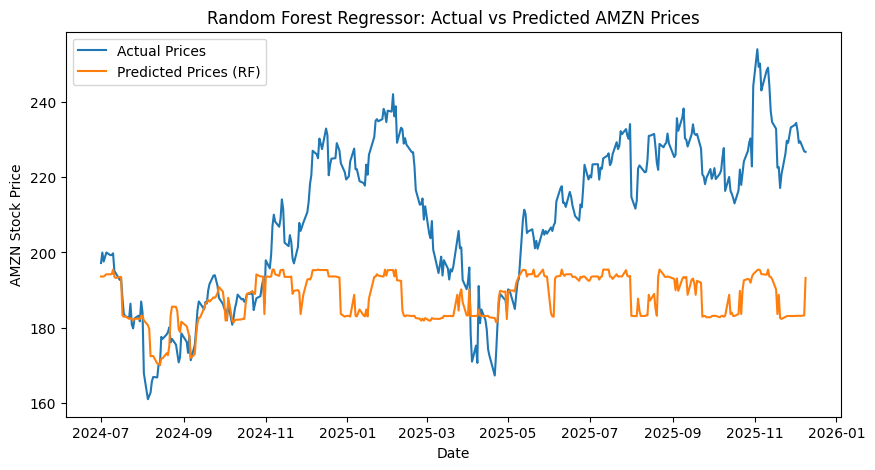

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_test_rf.index, y_test_rf, label='Actual Prices')
plt.plot(y_test_rf.index, rf_pred, label='Predicted Prices (RF)')
plt.title("Random Forest Regressor: Actual vs Predicted AMZN Prices")
plt.ylabel("AMZN Stock Price")
plt.xlabel("Date")
plt.legend()
plt.show()


Linear Regression -> MSE: 83.72, R²: 0.804
Random Forest -> MSE: 748.30, R²: -0.752


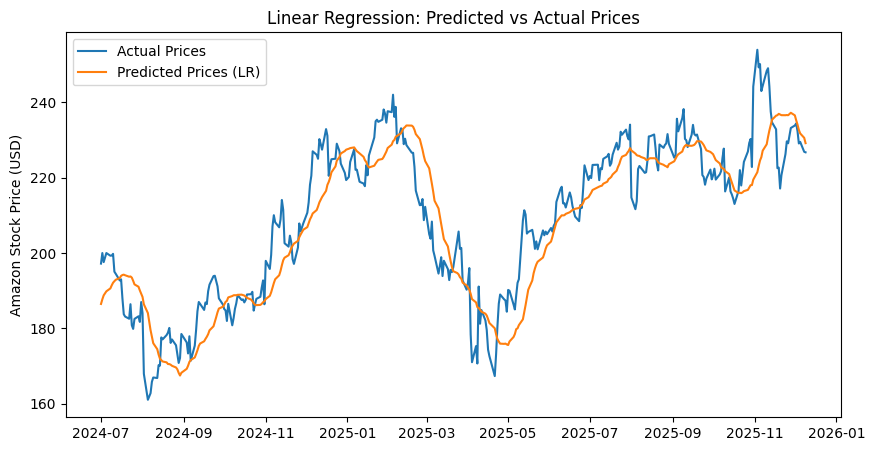

In [31]:

# Part A(g) – Random Forest vs Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yfin


# 1. Load Amazon Data (5 years)

ticker = 'AMZN'
data = yfin.Ticker(ticker).history(period='5y')


# 2. Calculate Technical Indicators

# Simple Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Exponential Moving Average
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()

# RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop rows with NaN values
data = data.dropna()


# 3. Split Train/Test Data

# Linear Regression features
X_lr = data[['MA20', 'MA50']]
# Random Forest features
X_rf = data[['MA20', 'EMA20', 'MA50', 'RSI']]
y = data['Close']

train_size = 0.7
t = int(train_size * len(data))

X_train_lr = X_lr[:t]
X_test_lr = X_lr[t:]
X_train_rf = X_rf[:t]
X_test_rf = X_rf[t:]
y_train = y[:t]
y_test = y[t:]

# 4. Train Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)


# 5. Train Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=123)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)


# 6. Evaluate Models

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.3f}")
print(f"Random Forest -> MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")


# 7. Visualise Linear Regression Predictions

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred_lr, label='Predicted Prices (LR)')
plt.legend()
plt.ylabel("Amazon Stock Price (USD)")
plt.title("Linear Regression: Predicted vs Actual Prices")
plt.show()
